In [1]:
pip install dowhy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-fuzzy


Requirement already up-to-date: scikit-fuzzy in c:\users\faghihi\anaconda3\lib\site-packages (0.4.2)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install prob140

Note: you may need to restart the kernel to use updated packages.


   Treatment    Outcome        w0
0   1.756025   4.156828 -4.039218
1   6.895578  14.241850  1.078018
2   9.515663  18.528922  3.429185
3   7.951019  16.541857  2.336732
4   5.762719  11.659238 -0.299123


'(11,4)\ndual x=min(1-0.6,0.9)=0.4\nasso x1=min(1-0.4+0.8,1)=1\nx=max(1-0.6,0.9)=0.9\nass min(1-0.9+0.8,1)=0.9'

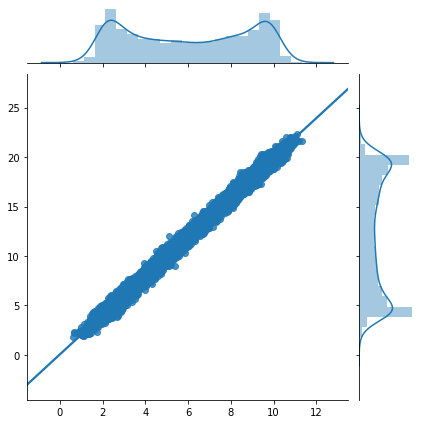

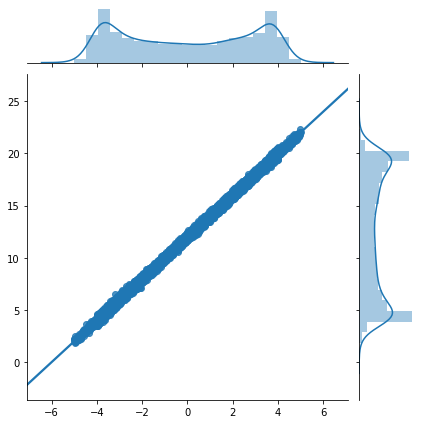

In [5]:
#we will start by visualising the dataset and highlighting the statistical dependance of the outcome and treatment
#https://microsoft.github.io/dowhy/dowhy_confounder_example.html
import dowhy
import dowhy.datasets
import seaborn as sns
import math
import numpy as np
rvar = 1 if np.random.uniform() >0.5 else 0
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar, sd_error=0.2)                                               
df = data_dict['df']  
a=df[["Treatment", "Outcome", "w0"]]  
print(a.head())                                                                             
t=df[['Treatment']] 
o=df[['Outcome']]
w=df[['w0']]
sns.jointplot(t,o, data=None, kind='reg')#the graph represents outcome=f(treatment)
sns.jointplot(w,o,data=None,kind='reg')#this grapg represents  outcome=f(w0)
'''(11,4)
dual x=min(1-0.6,0.9)=0.4
asso x1=min(1-0.4+0.8,1)=1
x=max(1-0.6,0.9)=0.9
ass min(1-0.9+0.8,1)=0.9'''
# t=0 et w0=4  | t=1 et w0=4

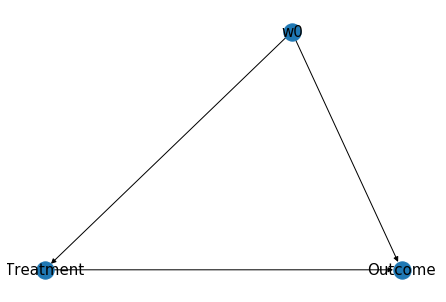

[[0 1 0]
 [0 0 0]
 [1 1 0]]


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
#graph adjacency matrix 
nod= np.matrix([[0, 1, 0],
               [0, 0, 0 ],
               [1, 1, 0 ]])

##  node coordinates on the xy plan
coords = np.array([[-30, 0],
               [100, 0], 
               [60, 20]]) 

G = nx.from_numpy_matrix(np.array(nod), create_using = nx.MultiDiGraph())
pos = coords
nx.draw(G,pos)
labels = {0:'Treatment',1:'Outcome',2:'w0'}

nx.draw_networkx_labels(G, pos, labels, font_size=15, arrows=True)
plt.show()
print(np.asarray(nod))

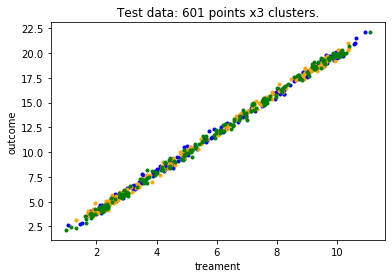

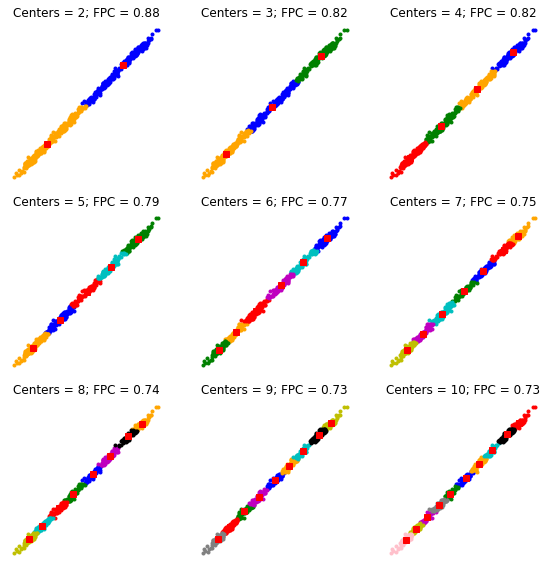

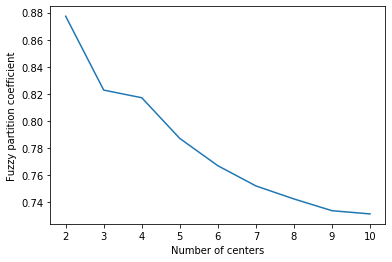

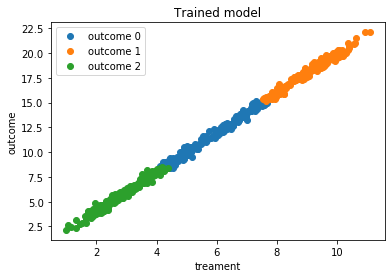

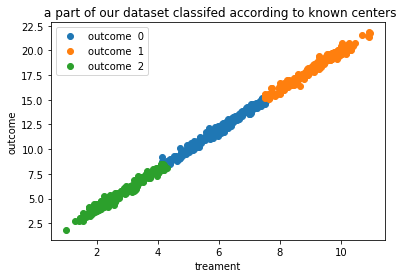

'\n\n'

In [12]:
#in this section we will use the c-means clustering method provided by scikit-fuzzy library
#https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html
"""
========================
Fuzzy c-means clustering
========================



Data generation(dowhy dataset)
-------------------------



"""
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'gray', 'pink']

# Define three cluster centers depending on the dataset we have
centers = [[2, 4],
           [6, 10],
           [10, 16]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [0.6, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

    
    
lx=list()
ly=list()
l1=list()
l2=list()
for i in range(601):
  lx.append(t.iloc[i,0])
  ly.append(o.iloc[i,0])
  l1.append(t.iloc[i+1000,0])
  l2.append(o.iloc[i+1000,0])
xpts=np.array(lx)
ypts=np.array(ly)
x=np.array(l1)
y=np.array(l2)
np.reshape(xpts,(601,))
np.reshape(ypts,(601,))
np.reshape(x,(601,))
np.reshape(y,(601,))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 601 points x3 clusters.')
plt.xlabel('treament', fontsize=10)
plt.ylabel('outcome', fontsize=10)

"""

Clustering
----------



in this section we clustered  our dataset with between 2 and 9 clusters.

"""
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

"""
.. image:: PLOT2RST.current_figure

The fuzzy partition coefficient (FPC)
-------------------------------------

The FPC is defined as a measure of how good our data is described ranging from o to 1 with 1 as the best representation of our data

"""

fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

"""
we will ignore the fpc and stick to the 3 centers model due the fact of having 3 membership functions 

====================
Classifying New Data
====================

.

Building the model
------------------

We know our best model has three cluster centers. We'll rebuild a 3-cluster
model for use in prediction, generate new uniform data, and predict which
cluster to which each new data point belongs.

"""
#  note that center ordering
# is random in this clustering algorithm, so the centers may change places
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='outcome ' + str(j))
plt.xlabel('treament', fontsize=10)
plt.ylabel('outcome', fontsize=10)
ax2.legend()

"""

Prediction
----------

.

"""

newdata=(np.vstack((x,y))).T

# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, cntr, 2, error=0.005, maxiter=1000)

#
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization
fig3, ax3 = plt.subplots()
ax3.set_title(' a part of our dataset classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='outcome  ' + str(j))
    
    
plt.xlabel('treament', fontsize=10)
plt.ylabel('outcome', fontsize=10)
ax3.legend()


plt.show()

"""

"""


In [13]:
import itertools
a=t.values.tolist()
#a function that approximates the treament value and return the corresponding outcome value
def appr(treatment):
  x=list(itertools.chain.from_iterable(t.values.tolist()))
  y=list(itertools.chain.from_iterable(o.values.tolist()))
  stackx=[x[0]]
  a=0
  for i in range(1,len(x)):
    if abs(stackx[-1]-treatment)>abs(x[i]-treatment):
      stackx.pop()
      stackx.append(x[i])
      a=i
  return 'closest treatment value ',stackx[-1],'corresponding outcome',y[a]
print(appr(11))



('closest treatment value ', 10.993211099230573, 'corresponding outcome', 21.621492768176854)


In [14]:
def clst_mbr(treatment_outcome,value):#a function that return the the cluster membership 
  if treatment_outcome=='t':
    l=list()
    for i in range(3):
      l.append((cntr[i,0]-value)**2)
    a=sorted(l)
  elif  treatment_outcome=='o':
    l=list()
    for i in range(3):
      l.append((cntr[i,0]-value)**2)
    a=sorted(l)  
  else :
    raise ValueError('wrong value input')
  index=l.index(a[0])
  if index==0 :
    return [1,0,0]#outcome degree 0
  if index==1 :
    return [0,1,0]#outcome degree 1
  if index==2 :
    return [0,0,1]#outcome degree 2

 

treatment_outcome=input('treatment or outcome [t/o]?')  
value =float(input('enter the value'))
print(clst_mbr(treatment_outcome,value))     
      
      

treatment or outcome [t/o]?t
enter the value11
[0, 1, 0]


In [15]:
import shapely.geometry as SG

def fuzzification(value): #function to get the y-label of each input
    l=list()
    xvalues=[[0,6],[0,6,12],[6,12]]
    yvalues=[[1,0],[0,1,0],[0,1]]
    for i in range(3):
      if value>=xvalues[i][0] and value<=xvalues[i][-1]:
        l.append(np.interp(value, xvalues[i],yvalues[i]))
    a=sorted(l)
    return a[-1] 

    

def membership_vector(value):
    l=list()
    vector=list()
    xvalues=[[0,6],[0,6,12],[6,12]]
    yvalues=[[1,0],[0,1,0],[0,1]]

    for i in range(3):
        l.append(np.interp(value, xvalues[i],yvalues[i]))
    a=sorted(l)
    for i in range(3):
        if i==l.index(a[-1]):
          vector.append(1)
        else :
          vector.append(0)
    return vector #return the membership vector for determining the outcome using the rules



def deffuzification(outcome_vector,outcome) :
#we will return the centroid of the four point that we got by explointing the funtion parameters
    xvalues=[[0,12],[0,12,24],[12,24]]
    yvalues=[[1,0],[0,1,0],[0,1]]
    lo =[0,1,0]
    med=[1,0,0] 
    hi=[0,0,1]
    if np.all(outcome_vector==med) :
        x=[0,12,24]
        y=[0,1,0]
    elif np.all(outcome_vector==lo):
        x=[0,12]
        y=[1,0]
    elif np.all(outcome_vector==hi):
        x=[12,24]
        y=[0,1]


    line = SG.LineString(list(zip(x,y)))
    y0 = outcome
    yline = SG.LineString([(min(x), y0), (max(x), y0)])
    coords = np.array(line.intersection(yline))   
    if coords.ndim==2 :
      if outcome<0.5 :
        centroid = coords[0,0]
      else :
        centroid=coords[1,0]
    elif coords.ndim==1 :
        if np.all(outcome_vector==lo):
        
            centroid=(coords[0]+2*x[0]+x[-1])/4
        else :
            centroid=(coords[0]+x[0]+2*x[-1])/4
    return centroid


def cause(treatment,w0):
  a=fuzzification(treatment)
  b=fuzzification(w0+6)
  '''the elimination rule to reduce the effect of the smoking gene on the smoking'''
  '''the association rule to highlight the effect of the smoking gene ''' 
  poss_out =[min(1-b,a),max(1-b,a),max (min(1-a,1-b),b) , 1 - a - b + 2*a*b +b**2- a*b**2, min(1, (max (0, 1-a-b) + b)), max (1-a, min (a,b)),1-a + b*a**2, min (1,1-a+b)]


  if  np.all(membership_vector(treatment)==[1,0,0]) :
    out_vector=[1,0,0]
  elif np.all(membership_vector(treatment)==[0,1,0]):
    out_vector=[0,1,0]
  elif  np.all(membership_vector(treatment)==[0,0,1]) :
    out_vector=[0,0,1]

  ##in this part we will only take consideration of the back-door effect of the cancer gene 
  ##if and only if it's in the dangerous interval [0,0,1]
  answer=list()
  for i in range(len(poss_out)):

    answer.append(deffuzification(out_vector,poss_out[i]))


  #the output  is the value of then cancer of percentage 
  return answer
print(cause(1,-4))

#[5.5, 3.5, 3.5, 3.4722222222222214, 3.5, 4.0, 3.888888888888889, 3.0]
# in the following 1 [1,12] is treatment et 4 is the w0 [-4,4]
#print(cause(1,-4)) output [3.9999999999999996, 14.0, 16.0, 15.777777777777775, 16.0, 16.0, 16.444444444444443, 14.0]
#print(cause(1,4))  output [4.0, 14.0, 16.0, 15.777777777777777, 16.0, 16.0, 16.444444444444443, 14.0]
#print(cause(12,4)) output [19.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]
#print(cause(10,4)) output  [19.0, 20.0, 20.0, 20.11111111111111, 20.0, 20.0, 19.88888888888889, 21.0]
#print(cause(9,4)) output [5.0, 4.5, 4.0, 3.8333333333333335, 4.0, 4.5, 4.0, 3.0]
#print(cause(9,0)) output  [6.0, 4.5, 3.0, 3.0, 3.0, 4.5, 3.75, 3.0]

[3.9999999999999996, 14.0, 16.0, 15.777777777777775, 16.0, 16.0, 16.444444444444443, 14.0]


13.91705924339757


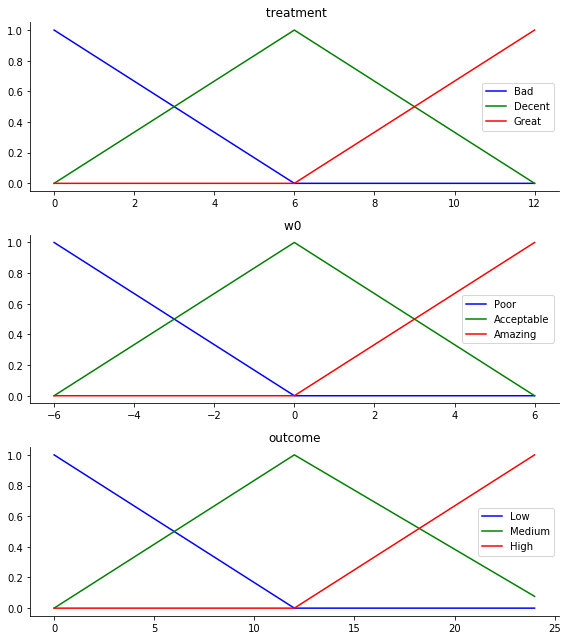

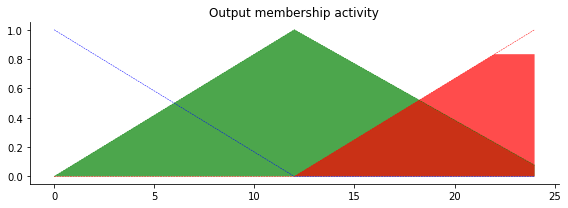

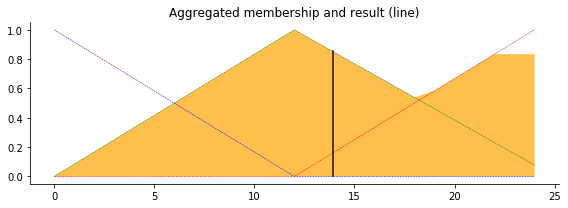

In [16]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

def fuzzy(a,b):
  # Generate universe variables
  #   * treatment and w0 on subjective ranges [0, 10]
  #   * Tip has a range of [0, 25] in units of percentage points
  x_treat = np.arange(0,13,  1)
  x_w0 = np.arange(-6, 7, 1)
  x_out  = np.arange(0, 25, 1)

  # Generate fuzzy membership functions
  treat_lo = fuzz.trimf(x_treat, [0, 0, 6])#the corresponding y value of the lo treatment
  treat_md = fuzz.trimf(x_treat, [0,6 , 12])
  treat_hi = fuzz.trimf(x_treat, [6, 12, 12])
  w0_lo = fuzz.trimf(x_w0, [-6, -6, 0])
  w0_md = fuzz.trimf(x_w0, [-6, 0, 6])
  w0_hi = fuzz.trimf(x_w0, [0, 6, 6])
  out_lo = fuzz.trimf(x_out, [0, 0, 12])
  out_md = fuzz.trimf(x_out, [0, 12, 25])
  out_hi = fuzz.trimf(x_out, [12, 24, 24])

# Visualize these universes and membership functions
  fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

  ax0.plot(x_treat, treat_lo, 'b', linewidth=1.5, label='Bad')
  ax0.plot(x_treat, treat_md, 'g', linewidth=1.5, label='Decent')
  ax0.plot(x_treat, treat_hi, 'r', linewidth=1.5, label='Great')
  ax0.set_title(' treatment')
  ax0.legend()

  ax1.plot(x_w0, w0_lo, 'b', linewidth=1.5, label='Poor')
  ax1.plot(x_w0, w0_md, 'g', linewidth=1.5, label='Acceptable')
  ax1.plot(x_w0, w0_hi, 'r', linewidth=1.5, label='Amazing')
  ax1.set_title('w0 ')
  ax1.legend()

  ax2.plot(x_out, out_lo, 'b', linewidth=1.5, label='Low')
  ax2.plot(x_out, out_md, 'g', linewidth=1.5, label='Medium')
  ax2.plot(x_out, out_hi, 'r', linewidth=1.5, label='High')
  ax2.set_title('outcome')
  ax2.legend()

# Turn off top/right axes
  for ax in (ax0, ax1, ax2):
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.get_xaxis().tick_bottom()
      ax.get_yaxis().tick_left()

  plt.tight_layout()



  # We need the activation of our fuzzy membership functions at these values.
  # The exact values 6.5 and 9.8 do not exist on our universes...
  # This is what fuzz.interp_membership exists for!
  treat_level_lo = fuzz.interp_membership(x_treat, treat_lo, a)
  #the interpolation of the 2.5 on the treat lo interval
  treat_level_md = fuzz.interp_membership(x_treat, treat_md, a)
  treat_level_hi = fuzz.interp_membership(x_treat, treat_hi, a)

  w0_level_lo = fuzz.interp_membership(x_w0, w0_lo, b)
  w0_level_md = fuzz.interp_membership(x_w0, w0_md, b)
  w0_level_hi = fuzz.interp_membership(x_w0, w0_hi, b)

# Now we take our rules and apply them. Rule 1 concerns bad food OR w0.
# The OR operator means we take the maximum of these two.

  active_rule1 = np.fmax(treat_level_lo, w0_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
  out_activation_lo = np.fmin(active_rule1, out_lo)  # removed entirely to 0

# For rule 2 we connect acceptable w0 to medium outping
  out_activation_md = np.fmin(w0_level_md, out_md)

# For rule 3 we connect high w0 OR high food with high outcome

  active_rule3 = np.fmax(treat_level_hi, w0_level_hi)
  out_activation_hi = np.fmin(active_rule3, out_hi)
  out0 = np.zeros_like(x_out)

# Visualize this
  fig, ax0 = plt.subplots(figsize=(8, 3))

  ax0.fill_between(x_out, out0, out_activation_lo, facecolor='b', alpha=0.7)
  ax0.plot(x_out, out_lo, 'b', linewidth=0.5, linestyle='--', )
  ax0.fill_between(x_out, out0, out_activation_md, facecolor='g', alpha=0.7)
  ax0.plot(x_out, out_md, 'g', linewidth=0.5, linestyle='--')
  ax0.fill_between(x_out, out0, out_activation_hi, facecolor='r', alpha=0.7)
  ax0.plot(x_out, out_hi, 'r', linewidth=0.5, linestyle='--')
  ax0.set_title('Output membership activity')

# Turn off top/right axes
  for ax in (ax0,):
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.get_xaxis().tick_bottom()
      ax.get_yaxis().tick_left()

  plt.tight_layout()



# Aggregate all three output membership functions together
  aggregated = np.fmax(out_activation_lo,
                     np.fmax(out_activation_md, out_activation_hi))

# Calculate defuzzified result
  out = fuzz.defuzz(x_out, aggregated, 'centroid')
  out_activation = fuzz.interp_membership(x_out, aggregated, out)  # for plot

# Visualize this
  fig, ax0 = plt.subplots(figsize=(8, 3))

  ax0.plot(x_out, out_lo, 'b', linewidth=0.5, linestyle='--', )
  ax0.plot(x_out, out_md, 'g', linewidth=0.5, linestyle='--')
  ax0.plot(x_out, out_hi, 'r', linewidth=0.5, linestyle='--')
  ax0.fill_between(x_out, out0, aggregated, facecolor='Orange', alpha=0.7)
  ax0.plot([out, out], [0, out_activation], 'k', linewidth=1.5, alpha=0.9)
  ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
  for ax in (ax0,):
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.get_xaxis().tick_bottom()
      ax.get_yaxis().tick_left()

  plt.tight_layout()
  return out
print(fuzzy(11,0))

In [17]:
#probability
import itertools
def prob(a,b,c,d):#p(c<=outcome<=d|a<=treatment<=b)
  x=list(itertools.chain.from_iterable(t.values.tolist()))
  y=list(itertools.chain.from_iterable(o.values.tolist()))
 
  lo =[0,1,0]
  med=[1,0,0] 
  hi=[0,0,1]
  count_t=0
  count_o=0
  for i in range(len(t)):
    if x[i]<=b and x[i]>=a and y[i]<=d and y[i]>=c:
      count_t+=1
  for i in range(len(t)):  
    if  x[i]<=b and x[i]>=a :
      count_o+=1
  return count_t,count_o,count_t/count_o
     
print(prob(5,8,14,23))


(884, 2436, 0.36288998357963875)


In [ ]:
#probability
def prob1(a,b,c,d):#p(c<=outcome<=d|a<w0<=b)
  x=list(itertools.chain.from_iterable(w.values.tolist()))
  y=list(itertools.chain.from_iterable(o.values.tolist()))
 
  lo =[0,1,0]
  med=[1,0,0] 
  hi=[0,0,1]
  count_t=0
  count_o=0
  for i in range(len(t)):
    if x[i]<=b and x[i]>=a and y[i]<=d and y[i]>=c:
      count_t+=1
  for i in range(len(t)):  
    if  x[i]<=b and x[i]>=a :
      count_o+=1
  return count_t,count_o,count_t/count_o

In [19]:
def plot(c,d):
  data=[]
  for i in range(12):
    data.append(prob(i,(i+1),c,d)[-1])
   

  return data  
print(plot(10,18))#considering all the treatment intervall 


[0.0, 0.0, 0.0, 0.0, 0.04707233065442021, 0.9311688311688312, 1.0, 1.0, 0.9312681510164569, 0.02645198389879241, 0.0, 0.0]


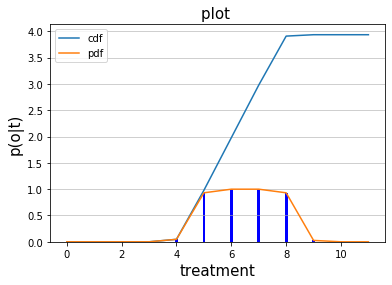

([0.0, 0.0, 0.0, 0.0, 0.04707233065442021, 0.9782411618232514, 1.9782411618232514, 2.9782411618232514, 3.9095093128397083, 3.9359612967385007, 3.9359612967385007, 3.9359612967385007], [0.0, 0.0, 0.0, 0.0, 0.04707233065442021, 0.9311688311688312, 1.0, 1.0, 0.9312681510164569, 0.02645198389879241, 0.0, 0.0])


In [20]:

def gra(c,d):
  
  edges=list()
  a=0
  x=list(itertools.chain.from_iterable(t.values.tolist()))
  hist=plot(c,d)
  y=[hist[0]]
  for i in range(12):
    edges.append(i)
  for i in range(1,12) :
    y.append(y[-1]+hist[i])  

  figure1, ax = plt.subplots(1) 

  plt.bar(edges, hist, width = 0.1, color='b')
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('treatment',fontsize=15)
  plt.ylabel('p(o|t)',fontsize=15)
  plt.title('plot ',fontsize=15)
  sns.lineplot(edges,y,label='cdf')
  sns.lineplot(edges,hist,label='pdf')
  plt.show()
  return y,hist
 
print(gra(10,18)) 



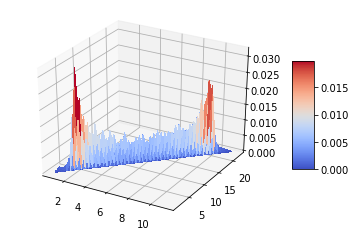

In [21]:
x=list(itertools.chain.from_iterable(t.values.tolist()))
y=list(itertools.chain.from_iterable(o.values.tolist()))
z=list(itertools.chain.from_iterable(w.values.tolist()))
distribution=np.vstack((x,y)).T
jointProbs, axes = np.histogramdd(distribution, bins=50)
jointProbs /= jointProbs.sum()
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
figure1 = plt.figure()
ax = figure1.gca(projection='3d')
# Plot the surface.

dis=ax.plot_surface(np.asarray(axes[0][0:-1]),np.asarray(axes[1][0:-1]), np.asarray(jointProbs), cmap=cm.coolwarm,linewidth=0, antialiased=False)
# Customize the z axis.
# Add a color bar which maps values to colors.
figure1.colorbar(dis, shrink=0.5, aspect=5)
plt.show()


In [23]:
x=list(itertools.chain.from_iterable(t.values.tolist()))[0:500]#treatment value
y=list(itertools.chain.from_iterable(o.values.tolist()))[0:500]#outcome value
z=list(itertools.chain.from_iterable(w.values.tolist()))[0:500]#w0 treatment
l=[]# l is the probability distribution array

for i in range(len(x)):
  for j in range(len(y)):
    l.append(cause(x[i],z[j])[0])

a=np.asarray(l)
print(a.shape,len(x),len(y))
r=np.reshape(a,(500,500))
print(r)
r /= r.sum()
'''def test(a,b,c,d):
  index=0
  for i in range(len(x)):
    for j in range(len(x)):
        if a<=x[i]<=b and c<=y[j]<=d:
          index=index+y[j]*r[i][j]*((max(x)-min(x))/500)*((max(y)-min(y))/500)

  return index

print(test(0,12,0,23))
print(test(6,12,15,23))
print(test(2,6,6,15))'''
print(x[-1])

(250000,) 500 500
[[ 5.10701733  4.9429353   4.86758068 ...  4.98108487  4.80220094
   5.97888664]
 [18.89298267 19.0570647  19.13241932 ... 19.01891513 19.19779906
  18.02111336]
 [ 3.57193066  4.22825881  4.52967728 ...  4.07566051  4.79119623
   0.08445343]
 ...
 [ 3.57193066  4.22825881  4.52967728 ...  4.07566051  4.79119623
   0.08445343]
 [18.89298267 19.0570647  19.13241932 ... 19.01891513 19.19779906
  18.02111336]
 [ 5.10701733  4.9429353   4.86758068 ...  4.98108487  4.80220094
   5.97888664]]
5.992809204442004


In [25]:
x=list(itertools.chain.from_iterable(t.values.tolist()))[0:500]
y=list(itertools.chain.from_iterable(o.values.tolist()))[0:500]
z=list(itertools.chain.from_iterable(w.values.tolist()))[0:500]
l=[]# l is the probability distribution array

for i in range(len(x)):
  for j in range(len(y)):
    l.append(cause(x[i],z[j])[0])

a=np.asarray(l)
print(a.shape,len(x),len(y))
r=np.reshape(a,(500,500))
r /= r.sum()
def test2(a,b,c,d):
  index=0
  for i in range(len(x)):
    for j in range(len(x)):
        if a<=z[i]<=b and c<=y[j]<=d:
          index=index+y[j]*r[i][j]*((max(z)-min(z))/500)*((max(y)-min(y))/500)

  return index
print(test2(-5,5,0,23))
print(test2(-5,0,15,23))
print(test2(0,5,6,15))

(250000,) 500 500
0.008720022684417189
0.0015571760705488467
0.0021954266594729982


|interval|observed|max(1-a,b)|min(1,1-a+b)|min(1-a,b)|
|----|---|----|--|--|
|(0,12,0,23)|0.009152277771489543|0.0093384144850809|0.009266712344908912|0.009836759960783465|
|(6,12,15,23)|0.005522336226089513|0.0029782153402013382|0.0031140187218552154|0.004058083903788503|
|(2,6,6,15)|0.0018613252907286725|0.0010758929666308732|0.001042907854222333|0.0008540531527420658|


---


The table above describes the expected value of the estimated causal effect of the Treatment and the confonding variable on the outcome result using  3 different fuzzy rules representing succesely  Kleene-Dienes ,Lukasiewiczrule,and implication t-conorm in comparaison with real outcome distribtion in 3 different interval parameters sets(the  value of the quadruple are respectively conditionnning on lowest value of the treatment , the highest for treament and the last two value likewise for the outcome).


In [26]:
x=list(itertools.chain.from_iterable(t.values.tolist()))[0:500]
y=list(itertools.chain.from_iterable(o.values.tolist()))[0:500]
z=list(itertools.chain.from_iterable(w.values.tolist()))[0:500]
distribution=np.vstack((x,y)).T
jointProbs, axes = np.histogramdd(distribution, bins=500)
jointProbs /= jointProbs.sum()
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from scipy.integrate import quad
import scipy.integrate as integrate
from scipy import interpolate
def test1(a,b,c,d):
  index=0
  for i in range(len(axes[0])-1):
    for j in range(len(axes[1])-1):
        if a<=axes[0][i]<=b and c<=axes[1][j]<=d:
          index=index+jointProbs[j][i]*axes[1][j]*((max(x)-min(x))/500)*((max(y)-min(y))/500)

  return index
print('delta t :(highest_value-lowest_value)/number_bins ',axes[0][3]-axes[0][2])
print('delta o',axes[1][5]-axes[1][4])

print(test1(0,12,0,23))
print(test1(6,12,15,23))
print(test1(2,6,6,15))
'''0.009152277771489543 ober
0.0093384144850809
0.005522336226089513
0.0029782153402013382
0.0018613252907286725
0.0010758929666308732'''

delta t :(highest_value-lowest_value)/number_bins  0.020073296010737263
delta o 0.03933981449942214
0.009098290064684725
0.004852031413469445
0.0021269286850987947


'0.009152277771489543 ober\n0.0093384144850809\n0.005522336226089513\n0.0029782153402013382\n0.0018613252907286725\n0.0010758929666308732'

In [27]:
x=list(itertools.chain.from_iterable(t.values.tolist()))
y=list(itertools.chain.from_iterable(o.values.tolist()))
z=list(itertools.chain.from_iterable(w.values.tolist()))
distribution=np.vstack((x,y)).T
jointProbs, axes = np.histogramdd(distribution, bins=10000)
jointProbs /= jointProbs.sum()
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from scipy.integrate import quad
import scipy.integrate as integrate
from scipy import interpolate
def answ(a,b,c,d):
  index=0
  for i in range(len(axes[0])-1):
    for j in range(len(axes[1])-1):
        if a<=axes[0][i]<=b and c<=axes[1][j]<=d:
          index=index+jointProbs[j][i]*axes[1][j]*0.0010624517358517327*0.0020427754600416126

  return index
print('delta t :(highest_value-lowest_value)/number_bins ',axes[0][3]-axes[0][2])
print('delta o',axes[1][5]-axes[1][4])
print(jointProbs)
print(jointProbs.sum())


delta t :(highest_value-lowest_value)/number_bins  0.0010741695612817015
delta o 0.00212200425843867
[[0.0001 0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.0001]]
0.9999999999999276


In [28]:
x=list(itertools.chain.from_iterable(t.values.tolist()))
y=list(itertools.chain.from_iterable(o.values.tolist()))
z=list(itertools.chain.from_iterable(w.values.tolist()))
distribution=np.vstack((x,y)).T
jointProbs, axes = np.histogramdd(distribution, bins=10000)
jointProbs /= jointProbs.sum()
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from scipy.integrate import quad
import scipy.integrate as integrate
from scipy import interpolate
def answ(a,b,c,d):
  index=0
  for i in range(len(axes[0])-1):
    for j in range(len(axes[1])-1):
        if a<=axes[0][i]<=b and c<=axes[1][j]<=d:
          index=index+jointProbs[j][i]*axes[1][i]

  return index
print('delta t :(highest_value-lowest_value)/number_bins ',axes[0][3]-axes[0][2])
print('delta o',axes[1][5]-axes[1][4])

#the causal effect estimation :
'''
#print(answ(0,12,0,23))  12.027756914975072
#print(answ(8,12,16,24))6.203232218209618
#print(answ(0,6,18,23)) 0

#print(answ(8,12,0,12))0
#print(answ(4,8,8,18))3.7107010250184334
#print(answ(0,6,0,10))2.461011811697479'''


delta t :(highest_value-lowest_value)/number_bins  0.0010741695612817015
delta o 0.00212200425843867


'\n#print(answ(0,12,0,23))  12.027756914975072\n#print(answ(8,12,16,24))6.203232218209618\n#print(answ(0,6,18,23)) 0\n\n#print(answ(8,12,0,12))0\n#print(answ(4,8,8,18))3.7107010250184334\n#print(answ(0,6,0,10))2.461011811697479'

In [ ]:
from datascience import *
from prob140 import *
x=list(itertools.chain.from_iterable(t.values.tolist()))[:3]
y=list(itertools.chain.from_iterable(o.values.tolist()))[:3]
z=list(itertools.chain.from_iterable(w.values.tolist()))

dist = Table().domain(x,y)
print(dist,x,y)

In [ ]:
x=list(itertools.chain.from_iterable(t.values.tolist()))#treatment value
y=list(itertools.chain.from_iterable(o.values.tolist()))#outcome value
z=list(itertools.chain.from_iterable(w.values.tolist()))#w0 treatment
x.sort()
y.sort()
z.sort()
def proba(p,q,c,d):#p(c<=outcome<=d|a<=treatment<=b)
  x=list(itertools.chain.from_iterable(t.values.tolist()))
  y=list(itertools.chain.from_iterable(o.values.tolist()))
  a=[]
  b=[]
  count_t=0
  count_o=0
  index=0
  index0=0
  for i in range(len(t)):
    if x[i]<=q and x[i]>=p and y[i]<=d and y[i]>=c:
      count_t+=1
      a.append(x[i])
  for i in range(len(t)):  
    if  x[i]<=q and x[i]>=p :
      count_o+=1
      b.append(y[i])
  for j in range(len(b)):
          index=index+b[j]/count_o
  return index
print(proba(0,4,18,23)-proba(8,12,18,23))

In [ ]:
import statistics 0<t<12 et 0<o<24
E(16<O <22 | 8<treatment<12)-E(16<O<22 |0<treatment<4) |observationanal data 
E(o=1|t=1)-E(o=1|t=0)
E(good o | good t)-E(good o | bad t)


$E[c<O<d|a<T<b]=\int_{c}^{d}O*P(O|T∈[a,b])=\int_{c}^{d}\int_{a}^{b}O*f_{o|t}(O,T)$
$\approx $
$\sum_{O∈Outcome}\sum_{T∈Treatment} O*f_{o|t}(O,T)\Delta A $
$E[O|T,w0]=E(O)$


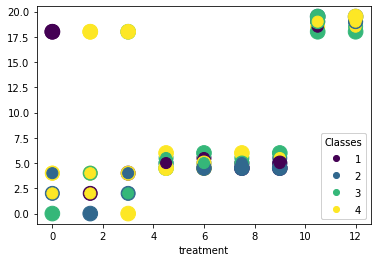

[3.9999999999999996, 18.0, 4.0, 2.0000000000000004, 0.0, 2.0, 3.9999999999999996, 18.0, 4.0, 3.9999999999999996, 18.0, 4.0, 2.0000000000000004, 0.0, 2.0, 3.9999999999999996, 18.0, 4.0, 3.9999999999999996, 18.0, 4.0, 2.0000000000000004, 0.0, 2.0, 3.9999999999999996, 18.0, 4.0, 5.0, 4.5, 5.0, 5.5, 6.0, 5.5, 5.0, 4.5, 5.0, 5.0, 4.5, 5.0, 5.5, 6.0, 5.5, 5.0, 4.5, 5.0, 5.0, 4.5, 5.0, 5.5, 6.0, 5.5, 5.0, 4.5, 5.0, 5.0, 4.5, 5.0, 5.5, 6.0, 5.5, 5.0, 4.5, 5.0, 19.0, 19.5, 19.0, 18.5, 18.0, 18.5, 19.0, 19.5, 19.0, 19.0, 19.5, 19.0, 18.5, 18.0, 18.5, 19.0, 19.5, 19.0] [-4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4]


In [29]:
N = 81

z=[]
t=[]
w=[]
for i in [0,1.5,3,4.5,6,7.5,9,10.5,12]:
  for j in [-4,-3,-2,-1,0,1,2,3,4]:
    z.append(cause(i,j)[0])
    t.append(i)
    w.append(j)

c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=3)
  
fig, ax = plt.subplots()

scatter = ax.scatter(np.asarray(t), np.asarray(z), c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.xlabel('treatment')

plt.show()
print(z,w)

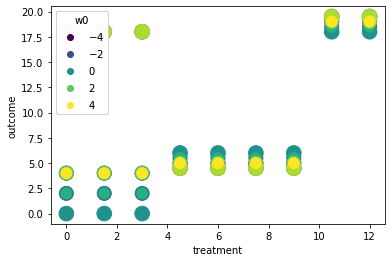

In [30]:
volume = np.asarray(t)
amount =np.asarray(z)
ranking = np.array(w)
price = s

fig, ax = plt.subplots()

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(volume, amount, c=ranking, s=s)

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="w0")
ax.add_artist(legend1)

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
plt.xlabel('treatment')
plt.ylabel('outcome')


plt.show()

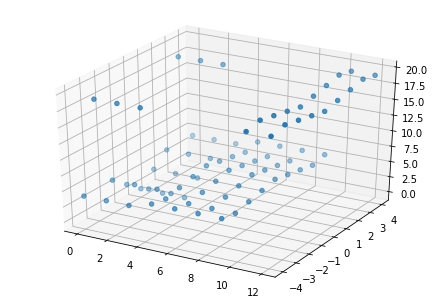

In [31]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure()
ax1 = Axes3D(fig)
ax1.scatter(np.asarray(t),np.asarray(w), np.asarray(z))
plt.show()

Text(27.125, 0.5, 'outcome')

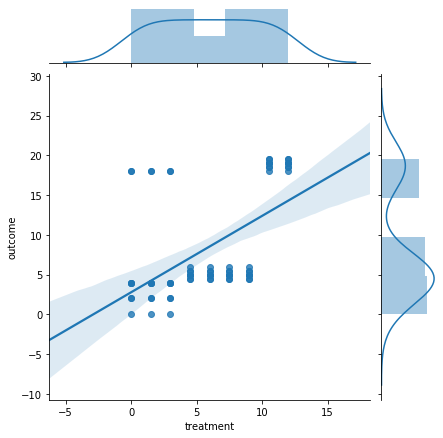

In [34]:
sns.jointplot(volume, amount, data=None, kind='reg')#the graph represents outcome=f(treatment)
plt.xlabel('treatment')
plt.ylabel('outcome')

In [38]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model = sm.OLS(amount,volume)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.718
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              204.0
Date:                Thu, 16 Jan 2020   Prob (F-statistic):                    1.02e-23
Time:                        16:10:00   Log-Likelihood:                         -256.73
No. Observations:                  81   AIC:                                      515.5
Df Residuals:                      80   BIC:                                      517.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------